In [ ]:
!pip install minisom

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import animation, colors
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from  sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# data visualization library
import os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import spectral_clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer_Data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
duplicate

NameError: ignored

In [ ]:
df.duplicated().sum()

0

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(((df <(Q1- 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))) . sum())

BALANCE                              695
BALANCE_FREQUENCY                   1493
CASH_ADVANCE                        1030
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
CREDIT_LIMIT                         248
CUST_ID                                0
INSTALLMENTS_PURCHASES               867
MINIMUM_PAYMENTS                     841
ONEOFF_PURCHASES                    1013
ONEOFF_PURCHASES_FREQUENCY           782
PAYMENTS                             808
PRC_FULL_PAYMENT                    1474
PURCHASES                            808
PURCHASES_FREQUENCY                    0
PURCHASES_INSTALLMENTS_FREQUENCY       0
PURCHASES_TRX                        766
TENURE                              1366
dtype: int64


In [ ]:
df_AfterOuyliersQuantileMethod=df[~((df<(Q1 - 1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))). any(axis=1)]
df_AfterOuyliersQuantileMethod

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,981.286008,1.000000,1370.00,1370.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1400.0,596.685481,451.584847,0.000000,12
8742,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.000000,12
8747,16.428326,0.909091,441.50,124.70,316.80,0.000000,1.000000,0.166667,0.916667,0.000000,0,14,1000.0,482.547848,91.328536,0.333333,12
8759,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,245.689379,167.126034,0.300000,12


In [ ]:
#Sigma Method


In [ ]:
df.mean()

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

In [ ]:
upper_limit=df.mean() +3*df.std()
upper_limit

BALANCE                              7809.070466
BALANCE_FREQUENCY                       1.587983
PURCHASES                            7413.109179
ONEOFF_PURCHASES                     5572.101123
INSTALLMENTS_PURCHASES               3124.081990
CASH_ADVANCE                         7270.362742
PURCHASES_FREQUENCY                     1.694463
ONEOFF_PURCHASES_FREQUENCY              1.097466
PURCHASES_INSTALLMENTS_FREQUENCY        1.556781
CASH_ADVANCE_FREQUENCY                  0.735508
CASH_ADVANCE_TRX                       23.722767
PURCHASES_TRX                          89.282780
CREDIT_LIMIT                        15410.896627
PAYMENTS                            10418.335123
MINIMUM_PAYMENTS                     7981.546362
PRC_FULL_PAYMENT                        1.031212
TENURE                                 15.532311
dtype: float64

In [ ]:
lower_limit=df.mean() -3*df.std()
lower_limit

BALANCE                            -4680.120811
BALANCE_FREQUENCY                      0.166559
PURCHASES                          -5406.699512
ONEOFF_PURCHASES                   -4387.226381
INSTALLMENTS_PURCHASES             -2301.946701
CASH_ADVANCE                       -5312.620517
PURCHASES_FREQUENCY                   -0.713762
ONEOFF_PURCHASES_FREQUENCY            -0.692551
PURCHASES_INSTALLMENTS_FREQUENCY      -0.827906
CASH_ADVANCE_FREQUENCY                -0.465220
CASH_ADVANCE_TRX                     -17.225113
PURCHASES_TRX                        -59.863115
CREDIT_LIMIT                       -6421.997726
PAYMENTS                           -6952.047419
MINIMUM_PAYMENTS                   -6253.133277
PRC_FULL_PAYMENT                      -0.723783
TENURE                                 7.502326
dtype: float64

In [ ]:
temp=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
df2=df.copy()

for i in temp:
    lower_limit= df[i]. mean() - 3 * df[i].std()
    upper_limit=df[i].mean() +3 * df[i].std()
    o=df[(df[i]> upper_limit) |  (df[i] < lower_limit)]
    display(o)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
30,C10031,12136.219960,1.0,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.0,12
87,C10092,8181.251131,1.0,2258.01,1318.78,939.23,5251.228934,1.000000,0.750000,1.000000,0.750000,21,60,13500.0,3021.575846,2074.581541,0.0,12
90,C10095,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.0,12
120,C10125,8504.876253,1.0,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.0,12
124,C10130,14224.115410,1.0,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,C17026,9321.555794,1.0,334.90,0.00,334.90,9463.245088,1.000000,0.000000,0.916667,0.083333,5,12,10000.0,2029.431421,3506.665810,0.0,12
7132,C17325,9024.812044,1.0,0.00,0.00,0.00,2750.442399,0.000000,0.000000,0.000000,0.083333,2,0,9000.0,302.484224,61031.618600,0.0,12
7427,C17630,9220.534572,1.0,1420.31,777.66,642.65,9816.782544,1.000000,0.250000,1.000000,0.833333,29,77,12500.0,4257.372749,4696.075967,0.0,12
7764,C17975,10856.483010,1.0,45.65,45.65,0.00,5096.886673,0.083333,0.083333,0.000000,0.250000,5,1,14500.0,2670.733732,2917.469357,0.0,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
63,C10065,7.152356,0.090909,840.00,840.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.0,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
103,C10108,0.624240,0.090909,389.96,0.0,389.96,0.000000,1.000000,0.000000,1.000000,0.000000,0,31,4500.0,0.000000,NaN,0.0,12
129,C10135,69.405545,0.090909,0.00,0.0,0.00,2799.714934,0.000000,0.000000,0.000000,0.083333,3,0,13000.0,0.000000,NaN,0.0,12
181,C10187,0.000000,0.000000,23.00,0.0,23.00,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,C18990,0.546067,0.090909,228.00,0.0,228.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,238.695115,16.127297,0.0,12
8753,C18992,0.223351,0.090909,336.00,0.0,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12
8755,C18994,3.036243,0.090909,0.00,0.0,0.00,81.569379,0.000000,0.000000,0.000000,0.083333,1,0,500.0,0.000000,NaN,0.0,12
8854,C19095,3.833185,0.125000,45.00,45.0,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,NaN,0.0,8


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
125,C10131,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
153,C10159,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12
171,C10177,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12
204,C10212,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,C17473,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12
7378,C17579,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12
7553,C17757,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.392320,556.651236,0.333333,12
8541,C18773,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
21,C10022,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12
125,C10131,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
171,C10177,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,C17473,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12
7378,C17579,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12
7553,C17757,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.392320,556.651236,0.333333,12
8215,C18435,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
90,C10095,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12
122,C10127,2114.158683,1.0,5580.85,0.00,5580.85,0.000000,1.000000,0.000000,1.000000,0.000000,0,75,8500.0,3564.977774,630.004130,0.000000,12
136,C10142,2494.868559,1.0,5491.79,1390.50,4101.29,0.000000,1.000000,0.500000,1.000000,0.000000,0,52,17000.0,1015.311953,615.924020,0.000000,12
138,C10144,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
150,C10156,7679.629040,1.0,4059.93,0.00,4059.93,555.469352,0.583333,0.000000,0.500000,0.166667,7,14,7000.0,3685.610620,12854.939700,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827,C18040,342.742855,1.0,3673.32,0.00,3673.32,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4500.0,3353.963174,3605.839798,0.333333,12
7843,C18056,618.966003,1.0,4709.14,395.92,4313.22,0.000000,1.000000,0.166667,1.000000,0.000000,0,18,4500.0,4627.972313,3959.316506,0.083333,12
8259,C18480,331.110003,1.0,3816.00,0.00,3816.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2350.0,3234.025148,1024.833655,0.250000,12
8313,C18534,420.348086,1.0,3986.24,833.24,3153.00,0.000000,1.000000,0.166667,1.000000,0.000000,0,22,1500.0,3100.021072,202.854078,0.666667,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
23,C10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12
36,C10037,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.000000,11
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
128,C10134,11167.234030,1.000000,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315,C18536,2648.244646,1.000000,0.00,0.00,0.00,10458.978150,0.000000,0.000000,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.000000,12
8422,C18648,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8
8705,C18942,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12
8857,C19098,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
28,C10029,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
86,C10090,7069.950386,1.000000,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.000000,0.750000,23,23,11000.0,4589.873897,1876.262988,0.000000,12
87,C10092,8181.251131,1.000000,2258.01,1318.78,939.23,5251.228934,1.000000,0.750000,1.000000,0.750000,21,60,13500.0,3021.575846,2074.581541,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,C18843,398.453246,1.000000,0.00,0.00,0.00,647.778706,0.000000,0.000000,0.000000,0.857143,10,0,500.0,323.875395,110.678562,0.000000,7
8649,C18885,543.219992,0.833333,0.00,0.00,0.00,1497.188933,0.000000,0.000000,0.000000,0.833333,8,0,3000.0,407.343532,99.150338,0.250000,6
8705,C18942,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12
8835,C19076,1868.576501,1.000000,1337.34,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.000000,10,23,3000.0,3236.129237,384.230828,0.000000,6


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
107,C10112,4986.400804,1.000000,0.00,0.00,0.00,5439.467563,0.000000,0.000000,0.000000,0.583333,40,0,8000.0,1241.538024,1439.230899,0.000000,12
153,C10159,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12
182,C10188,2881.253586,1.000000,117.00,0.00,117.00,17661.494860,0.250000,0.000000,0.166667,0.750000,28,3,4500.0,17301.832380,931.618475,0.166667,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,C18588,3857.562230,1.000000,0.00,0.00,0.00,2127.213754,0.000000,0.000000,0.000000,1.142857,26,0,5000.0,617.508991,538.396872,0.000000,7
8422,C18648,3911.628474,0.875000,0.00,0.00,0.00,11951.903320,0.000000,0.000000,0.000000,0.500000,40,0,7000.0,7918.877416,905.569605,0.166667,8
8549,C18782,236.996845,0.727273,0.00,0.00,0.00,3806.179299,0.000000,0.000000,0.000000,0.666667,41,0,1000.0,4609.777736,139.364536,0.600000,12
8684,C18921,1929.555023,1.000000,621.11,621.11,0.00,6691.286753,0.333333,0.333333,0.000000,0.666667,29,5,6000.0,2406.905963,549.027080,0.000000,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
21,C10022,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.0,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12
125,C10131,2392.917738,1.0,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.0,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,C10144,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.0,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
144,C10150,2163.678757,1.0,5779.36,3436.53,2342.83,0.000000,1.000000,1.000000,1.0,0.000000,0,97,6500.0,4416.412680,546.439139,0.000000,12
153,C10159,13673.079610,1.0,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.0,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,C18006,223.281483,1.0,4151.48,3113.59,1037.89,0.000000,1.000000,0.916667,1.0,0.000000,0,92,3000.0,3450.614791,171.300306,0.900000,12
7847,C18060,2030.838228,1.0,3165.54,1591.65,1573.89,0.000000,1.000000,0.583333,1.0,0.000000,0,151,6000.0,1872.134044,438.771190,0.000000,12
7877,C18091,2912.281553,1.0,1228.07,0.00,1228.07,2784.294727,1.000000,0.000000,1.0,0.416667,10,111,5400.0,1305.296349,1274.258165,0.000000,12
7911,C18125,530.574252,1.0,5221.42,2202.78,3018.64,0.000000,1.000000,1.000000,1.0,0.000000,0,135,3000.0,4590.877822,191.304474,0.583333,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
85,C10089,134.917202,1.000000,1247.80,1247.80,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,22,16500.0,1275.229436,171.357189,1.00,12
120,C10125,8504.876253,1.000000,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.000000,0.500000,10,85,17000.0,1888.756861,2167.446204,0.00,12
124,C10130,14224.115410,1.000000,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.00,12
128,C10134,11167.234030,1.000000,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.00,12
136,C10142,2494.868559,1.000000,5491.79,1390.50,4101.29,0.000000,1.000000,0.500000,1.000000,0.000000,0,52,17000.0,1015.311953,615.924020,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,C16609,6650.001408,1.000000,275.38,235.71,39.67,494.997609,0.250000,0.166667,0.166667,0.333333,9,7,15500.0,1386.144517,1538.648155,0.00,12
6600,C16781,8465.296023,1.000000,1066.91,817.43,249.48,1870.467411,1.000000,0.166667,0.916667,0.083333,1,23,17150.0,1742.775616,2037.922023,0.00,12
6629,C16812,16259.448570,1.000000,5024.68,3582.45,1442.23,328.698275,1.000000,0.833333,1.000000,0.083333,2,143,18000.0,4987.235359,5137.504664,0.00,12
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.014960,11853.796130,0.75,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
39,C10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.07544,719.948985,0.333333,12
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.69446,1107.030803,0.454545,12
109,C10114,6644.201651,1.000000,4478.75,2721.59,1757.16,7205.520805,1.000000,0.916667,1.000000,0.583333,21,64,9000.0,10857.94321,2469.571326,0.083333,12
125,C10131,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.71557,2000.990921,0.000000,12
133,C10139,9354.060450,1.000000,796.33,796.33,0.00,13748.471310,0.083333,0.083333,0.000000,0.666667,16,1,13000.0,10664.65866,2600.875721,0.083333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,C17473,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.50351,188.413837,0.666667,12
7426,C17629,36.979201,0.181818,0.00,0.00,0.00,4262.120108,0.000000,0.000000,0.000000,0.166667,2,0,2500.0,22099.47812,173.243670,0.000000,12
7553,C17757,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.39232,556.651236,0.333333,12
7645,C17851,7081.171387,1.000000,0.00,0.00,0.00,26194.049540,0.000000,0.000000,0.000000,0.909091,69,0,9000.0,20191.30770,1926.017588,0.222222,11


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
19,C10020,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12
20,C10021,2016.684686,1.000000,176.68,0.00,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.000000,12
34,C10035,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12
78,C10082,1205.716678,1.000000,0.00,0.00,0.00,38.325801,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,29.278671,8242.687678,0.000000,12
90,C10095,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,C18495,1410.909779,1.000000,698.88,0.00,698.88,948.848018,1.000000,0.000000,1.000000,0.166667,8,12,1200.0,79.578186,11795.280960,0.083333,12
8470,C18700,2046.727519,0.818182,1369.72,422.44,947.28,1817.810563,0.750000,0.166667,0.666667,0.166667,4,17,2500.0,242.742734,10729.194160,0.000000,12
8614,C18848,1182.080141,1.000000,266.68,0.00,266.68,848.848179,0.666667,0.000000,0.666667,0.083333,6,8,1000.0,119.861878,8607.234543,0.000000,12
8688,C18925,2898.484109,1.000000,0.00,0.00,0.00,3021.097135,0.000000,0.000000,0.000000,0.272727,5,0,3000.0,230.794237,13916.085930,0.000000,11


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.00,7
164,C10170,114.593817,1.000000,469.98,0.00,469.98,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,367.109312,86.102479,0.50,6
173,C10179,2187.732265,0.857143,0.00,0.00,0.00,3905.326256,0.000000,0.000000,0.000000,0.285714,9,0,3000.0,1423.788603,461.365626,0.20,7
222,C10231,41.642389,0.857143,75.99,75.99,0.00,0.000000,0.142857,0.142857,0.000000,0.000000,0,1,2700.0,69.163384,99.401747,0.00,7
263,C10274,7755.698607,1.000000,8533.54,4072.76,4460.78,7540.307350,1.000000,0.500000,0.833333,0.500000,12,72,10000.0,4758.209146,7256.951816,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


In [ ]:
for i in temp:
    lower_limit= df[i]. mean() - 3 * df[i].std()
    upper_limit=df[i].mean() +3 * df[i].std()
    df=df[(df[i]< upper_limit) &  (df[i] > lower_limit)]
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,C19117,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125,3,7,500.0,98.225317,113.944625,0.000000,8
8877,C19118,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000,0,7,1000.0,62.619008,109.580539,0.000000,8
8878,C19119,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125,3,0,1200.0,150.755024,337.986933,0.000000,8
8879,C19120,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000,0,6,1000.0,169.249683,124.639905,0.000000,8


In [ ]:
df.isna().sum(axis=0)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
#6 sigma
for i in df.columns:
    print(i,len(df[df[i]==0]))

CUST_ID 0
BALANCE 0
BALANCE_FREQUENCY 0
PURCHASES 1486
ONEOFF_PURCHASES 3290
INSTALLMENTS_PURCHASES 2913
CASH_ADVANCE 3583
PURCHASES_FREQUENCY 1485
ONEOFF_PURCHASES_FREQUENCY 3290
PURCHASES_INSTALLMENTS_FREQUENCY 2912
CASH_ADVANCE_FREQUENCY 3583
CASH_ADVANCE_TRX 3583
PURCHASES_TRX 1485
CREDIT_LIMIT 0
PAYMENTS 0
MINIMUM_PAYMENTS 0
PRC_FULL_PAYMENT 4325
TENURE 0


In [ ]:
# quantile
for i in df_AfterOuyliersQuantileMethod.columns:
    print(i,len(df_AfterOuyliersQuantileMethod[df_AfterOuyliersQuantileMethod[i]==0]))

CUST_ID 0
BALANCE 0
BALANCE_FREQUENCY 0
PURCHASES 845
ONEOFF_PURCHASES 1579
INSTALLMENTS_PURCHASES 1485
CASH_ADVANCE 1442
PURCHASES_FREQUENCY 844
ONEOFF_PURCHASES_FREQUENCY 1579
PURCHASES_INSTALLMENTS_FREQUENCY 1484
CASH_ADVANCE_FREQUENCY 1442
CASH_ADVANCE_TRX 1442
PURCHASES_TRX 845
CREDIT_LIMIT 0
PAYMENTS 46
MINIMUM_PAYMENTS 0
PRC_FULL_PAYMENT 2427
TENURE 0


In [ ]:
#counting NaN(6 sigma method)
df.isnull().sum().sum()

0

In [ ]:
#counting Nan (quantile method)
df_AfterOuyliersQuantileMethod.isnull().sum().sum()

49

In [ ]:
df=df.drop("CUST_ID", axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125,3,7,500.0,98.225317,113.944625,0.000000,8
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000,0,7,1000.0,62.619008,109.580539,0.000000,8
8878,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125,3,0,1200.0,150.755024,337.986933,0.000000,8
8879,137.744895,1.000000,441.00,0.00,441.00,0.000000,0.750000,0.000000,0.625000,0.000,0,6,1000.0,169.249683,124.639905,0.000000,8


In [ ]:
Min_max_Scaled =MinMaxScaler().fit_transform(df)
df_Min_max= pd.DataFrame(Min_max_Scaled, columns= list(df.columns))
df_Min_max

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.005241,0.777778,0.021180,0.000000,0.045028,0.000000,0.166667,0.000000,0.083333,0.0000,0.000000,0.033898,0.066148,0.036115,0.023100,0.000000,1.0
1,0.410411,0.888889,0.000000,0.000000,0.000000,0.988555,0.000000,0.000000,0.000000,0.3750,0.266667,0.000000,0.533074,0.734465,0.177579,0.222222,1.0
2,0.319765,1.000000,0.171653,0.258460,0.000000,0.000000,1.000000,1.000000,0.000000,0.0000,0.000000,0.203390,0.571984,0.111346,0.103877,0.000000,1.0
3,0.104794,1.000000,0.003552,0.005349,0.000000,0.000000,0.083333,0.083333,0.000000,0.0000,0.000000,0.016949,0.081712,0.121418,0.040535,0.000000,1.0
4,0.231938,1.000000,0.296005,0.000000,0.629303,0.000000,0.666667,0.000000,0.583333,0.0000,0.000000,0.135593,0.128405,0.250612,0.398643,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,0.015544,0.694445,0.085533,0.128787,0.000000,0.026015,0.500000,0.500000,0.000000,0.1875,0.200000,0.118644,0.027237,0.017574,0.018866,0.000000,0.0
6564,0.007067,0.847222,0.036257,0.000000,0.077082,0.000000,0.875000,0.000000,0.750000,0.0000,0.000000,0.118644,0.066148,0.011200,0.018144,0.000000,0.0
6565,0.111408,0.694445,0.000000,0.000000,0.000000,0.177049,0.000000,0.000000,0.000000,0.1875,0.200000,0.000000,0.081712,0.026977,0.055968,0.000000,0.0
6566,0.017652,1.000000,0.097908,0.000000,0.208150,0.000000,0.750000,0.000000,0.625000,0.0000,0.000000,0.101695,0.066148,0.030288,0.020638,0.000000,0.0


In [ ]:
df_DBC = df_Min_max
df_HC = df_Min_max
df_KM = df_Min_max

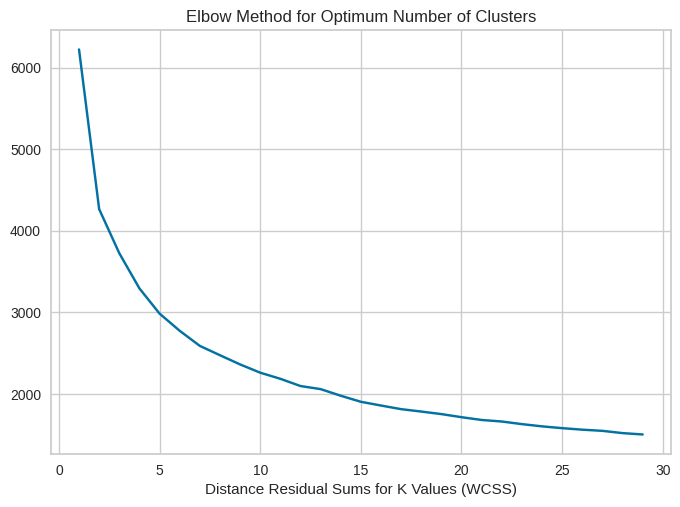

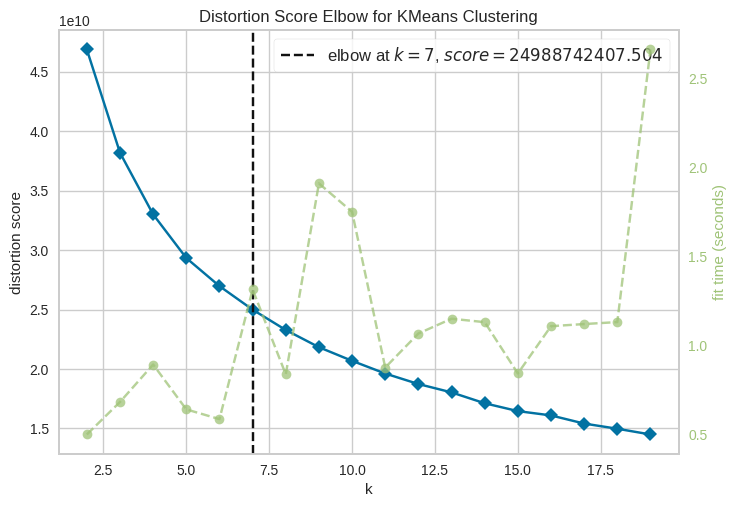

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

# KMeans Clustering
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_KM)
    ssd.append(kmeans.inertia_)

ssd

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums for K Values (WCSS)")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(df)
visu.show()

In [ ]:
kmeans = KMeans(n_clusters=7).fit(df_KM)
clusters = kmeans.labels_

pd.DataFrame({"Customers": df_KM.index, "Clusters": clusters})
df_KM["cluster_no"] = clusters
df_KM.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_no
0,0.005241,0.777778,0.021180,0.000000,0.045028,0.000000,0.166667,0.000000,0.083333,0.000,0.000000,0.033898,0.066148,0.036115,0.023100,0.000000,1.0,2
1,0.410411,0.888889,0.000000,0.000000,0.000000,0.988555,0.000000,0.000000,0.000000,0.375,0.266667,0.000000,0.533074,0.734465,0.177579,0.222222,1.0,3
2,0.319765,1.000000,0.171653,0.258460,0.000000,0.000000,1.000000,1.000000,0.000000,0.000,0.000000,0.203390,0.571984,0.111346,0.103877,0.000000,1.0,5
3,0.104794,1.000000,0.003552,0.005349,0.000000,0.000000,0.083333,0.083333,0.000000,0.000,0.000000,0.016949,0.081712,0.121418,0.040535,0.000000,1.0,2
4,0.231938,1.000000,0.296005,0.000000,0.629303,0.000000,0.666667,0.000000,0.583333,0.000,0.000000,0.135593,0.128405,0.250612,0.398643,0.000000,1.0,1


In [ ]:
df_KM["cluster_no"] = df_KM["cluster_no"] + 1
df_KM.groupby("cluster_no").agg({"cluster_no": "count"})

,cluster_no
cluster_no,
1,817
2,1318
3,1789
4,920
5,518
6,640
7,566


In [ ]:
df_KM.groupby("cluster_no").agg(np.mean)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_no,,,,,,,,,,,,,,,,,
1,0.014165,0.291612,0.068549,0.067221,0.050982,0.038513,0.223200,0.075469,0.140216,0.046471,0.038025,0.062486,0.253955,0.155280,0.024185,0.258761,0.924113
2,0.121578,0.928887,0.144372,0.041929,0.248117,0.047409,0.859435,0.073236,0.810568,0.090524,0.078048,0.276883,0.221609,0.158937,0.100172,0.054140,0.943096
3,0.158801,0.964746,0.043171,0.051633,0.018921,0.063035,0.127226,0.070127,0.055479,0.142380,0.100354,0.036039,0.215659,0.134187,0.089726,0.018629,0.939771
4,0.361408,0.951348,0.038389,0.040903,0.023879,0.350239,0.117511,0.064365,0.053719,0.541743,0.515652,0.037270,0.355597,0.277248,0.162771,0.024393,0.910870
5,0.198768,0.975959,0.493097,0.448056,0.415685,0.056767,0.937262,0.608694,0.793212,0.104624,0.089060,0.589621,0.443434,0.366703,0.097764,0.191775,0.976351
6,0.152741,0.952182,0.257493,0.355545,0.045623,0.038831,0.738509,0.689222,0.122294,0.073616,0.057917,0.277569,0.359001,0.233602,0.084528,0.184791,0.953125
7,0.009516,0.883653,0.165662,0.029208,0.311030,0.002390,0.863637,0.055524,0.809399,0.004822,0.002827,0.256543,0.264915,0.144427,0.028912,0.770879,0.901502


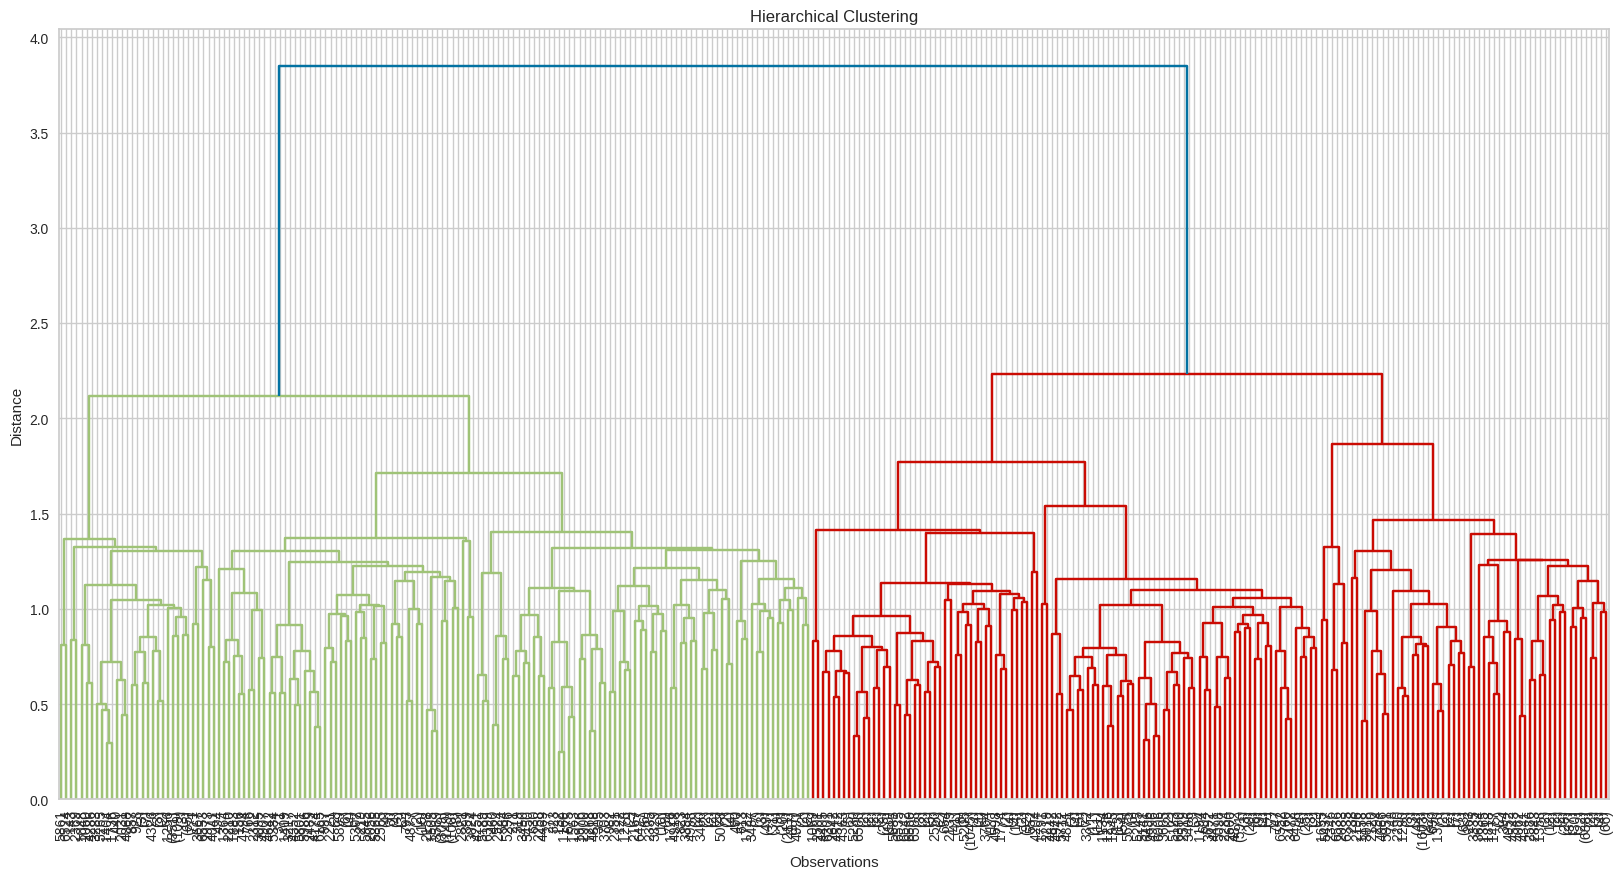

In [ ]:
# Average Linkage Method
hc_average = linkage(df_HC, "average")

plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average,
           leaf_font_size=10,
           p=10,
           show_contracted=True,
          truncate_mode='level')
plt.show()

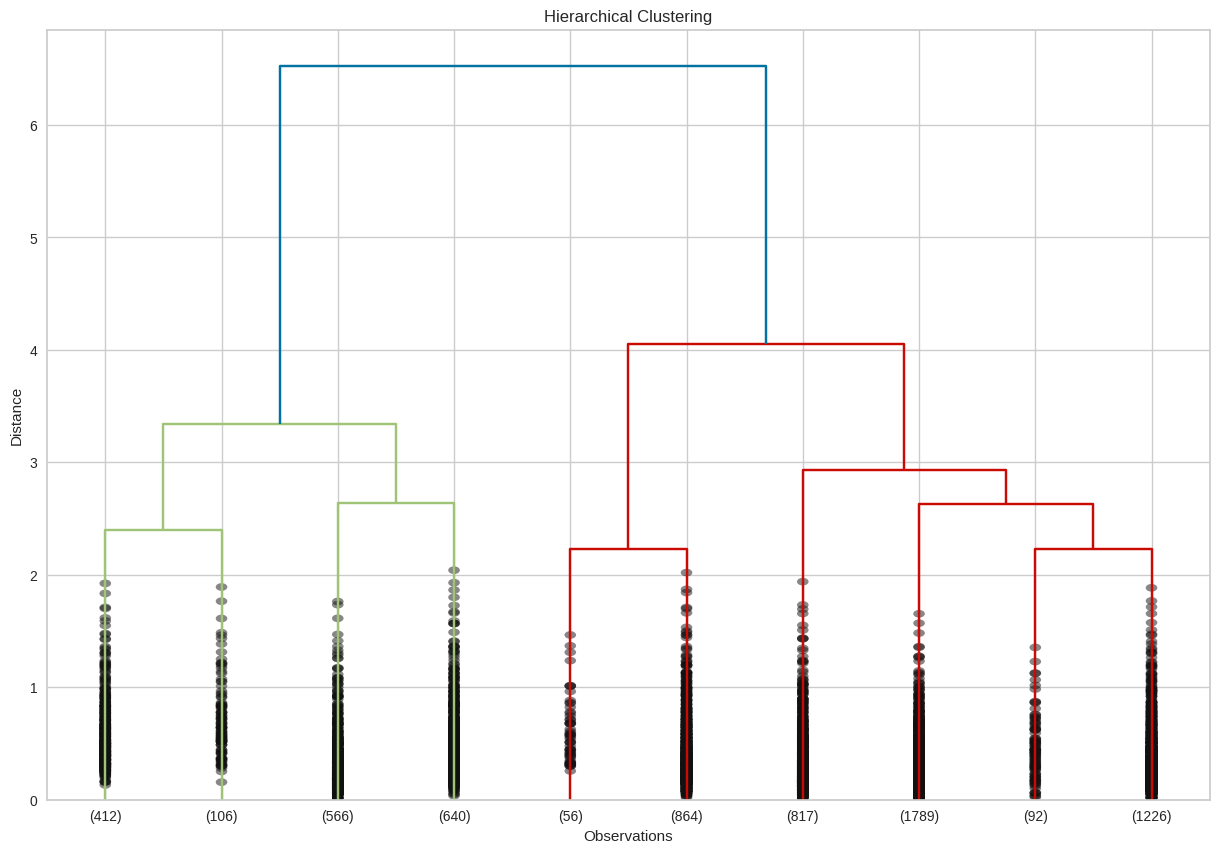

In [ ]:
# Complete Linkage Method
hc_complete = linkage(df_HC, "complete")

plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()


In [ ]:
fviz_nbclust(df, FUN = hcut, method = "wss")

NameError: ignored

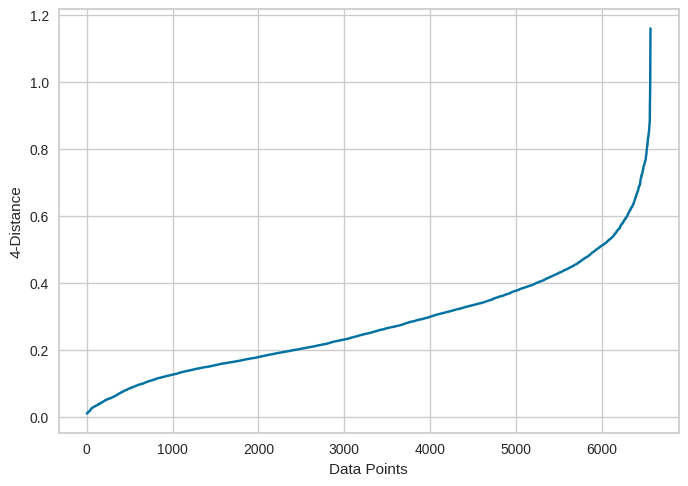

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Calculate k-distance
k = 4  # Set the desired value for k
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df_DBC)
distances, _ = neigh.kneighbors(df_DBC)

# Sort distances and plot the k-distance graph
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel(f"{k}-Distance")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_DBC)

DBSCAN()

In [ ]:
cluster_labels = dbscan.labels_
pd.DataFrame({"Customers": df_DBC.index, "Clusters": cluster_labels})
df_DBC["cluster_no"] = cluster_labels
df_DBC.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_no
0,0.005241,0.777778,0.021180,0.000000,0.045028,0.000000,0.166667,0.000000,0.083333,0.000,0.000000,0.033898,0.066148,0.036115,0.023100,0.000000,1.0,0
1,0.410411,0.888889,0.000000,0.000000,0.000000,0.988555,0.000000,0.000000,0.000000,0.375,0.266667,0.000000,0.533074,0.734465,0.177579,0.222222,1.0,1
2,0.319765,1.000000,0.171653,0.258460,0.000000,0.000000,1.000000,1.000000,0.000000,0.000,0.000000,0.203390,0.571984,0.111346,0.103877,0.000000,1.0,2
3,0.104794,1.000000,0.003552,0.005349,0.000000,0.000000,0.083333,0.083333,0.000000,0.000,0.000000,0.016949,0.081712,0.121418,0.040535,0.000000,1.0,0
4,0.231938,1.000000,0.296005,0.000000,0.629303,0.000000,0.666667,0.000000,0.583333,0.000,0.000000,0.135593,0.128405,0.250612,0.398643,0.000000,1.0,3


In [ ]:
df_DBC["cluster_no"] = df_DBC["cluster_no"] + 1
df_DBC.groupby("cluster_no").agg({"cluster_no": "count"})

,cluster_no
cluster_no,
0,414
1,1783
2,839
3,562
4,1250
5,782
6,393
7,545


In [ ]:
x=df.iloc[:, :-1].values
y=df.iloc[:, :-1].values
x=(x-np.mean(x,axis=0))/np.std(x,axis=0)

In [ ]:
som = MiniSom(10, 10, x.shape[1], sigma=1.0, learning_rate=0.5)


In [ ]:
som.train(x,1000)

In [ ]:
labels=np.zeros(x.shape[0])
for i ,x in enumerate(x):
  w= som.winner(x)
  plot(w[0]+0.5,
       w[1 +0.5])



In [ ]:
from pylab import bone, pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i, x in enumerate(x):
    w= som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
          markers[y[i]],
          markeredgecolor = colors[y[i]],
          markerfacecolor='None',
          markersize=10,
          markeredgewidth=2)









In [ ]:
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [ ]:
range_n_clusters=[3,4,5,7]
davies_bouldin_score_avg=[]
for num_clusters in range_n_clusters:
  sc= SpectralClustering(n_clusters=num_clusters )
  sc.fit(Df)
  cluster_labels=sc.labels
davies_bouldin_score_avg.append( davies_bouldin_score(DF,cluster_lables))
plt.plot(range_n_clusters, davies_bouldin_score_avg)
plt.xlabel("values of k ")
plt.ylabel("davies_bouldin_score ")
plt.title("davies_bouldin")
plt.show()

In [ ]:
df_ms = df_Min_max.loc[:,['BALANCE','PURCHASES','TENURE']]

In [ ]:
df_ms = pd.DataFrame(data = df_ms,columns =['BALANCE','PURCHASES','TENURE'])

In [ ]:
df_ms.reset_index(drop = True,inplace = True)

In [ ]:
ms = MeanShift()
ms.fit(df_ms)

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df_ms['BALANCE'].astype(float),df_ms['PURCHASES'].astype(float),df_ms['TENURE'].astype(int), c =df_ms['cluster'],cmap = 'virids')
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('TENURE')

plt.show()

In [ ]:
import pandas as pdimport pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift

# Select columns from the DataFrame
df_ms = df.loc[:, ['Aroma', 'Flavor', 'Acidity']]

# Create a new DataFrame
df_ms = pd.DataFrame(data=df_ms, columns=['Aroma', 'Flavor', 'Acidity'])

# Perform Mean Shift clustering
ms = MeanShift()
ms.fit(df_ms)

# Retrieve the cluster labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Number of clusters
num_clusters = len(cluster_centers)

# Visualize the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ms['Aroma'], df_ms['Flavor'], df_ms['Acidity'], c=labels, cmap='viridis')
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='x', label='Cluster Centers')
ax.set_xlabel('Aroma')
ax.set_ylabel('Flavor')
ax.set_zlabel('Acidity')
plt.title('Mean Shift Clustering')
plt.legend()
plt.show()
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

# Select columns from the DataFrame
df_ms = df.loc[:, ['BALANCE', 'PURCHASES*', 'TENURE*1']]

# Create a new DataFrame
df_ms = pd.DataFrame(data=df_ms, columns=['BALANCE', 'PURCHASES', 'TENURE'])

# Reset the index
df_ms.reset_index(drop=True, inplace=True)

# Perform Mean Shift clustering
ms = MeanShift()
ms.fit(df_ms)

# Retrieve the cluster labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Number of clusters
num_clusters = len(cluster_centers)

# Plot the data points with color-coded clusters
plt.scatter(df_ms['BALANCE'], df_ms['PURCHASES'], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red'